<h1><center>Data Processing- Summer 2020</h1></center><h3><center>Assignment 2</h3></center>


### 1. Task 1

Explore the dataset. Plot the distribution of the attributes if applicable. Find most/least common words, average sentence length for textual attributes? What is the proportion of each class in the dataset? What trends can you find in your data?


Anlyzing Release Year attribute:

    The most common word in the Release Year is :: 2013
    The least common word in the Release Year is :: 1901
    Average sentence length for Release Year attributes: 4

Anlyzing Origin/Ethnicity attribute:

    The most common word in the Origin/Ethnicity is :: American
    The least common word in the Origin/Ethnicity is :: Maldivian
    Average sentence length for Origin/Ethnicity attributes:  7.786762598176919
    
Anlyzing Title attribute:

    The most common word in the Title is :: Cinderella
    The least common word in the Title is :: Do Dooni Chaar
    Average sentence length for Title attributes:  15.540073381872384
    
Anlyzing Director attribute:

    The most common word in the Director is :: Unknown
    The least common word in the Director is :: Scott Dow
    Average sentence length for Director attributes:  13.709167001089263
    
Anlyzing Cast attribute:

    The most common  in the Cast is :: Tom and Jerry
    The least common  in the Cast is :: Sterling Hayden, Joy Page
    Average sentence length for Cast attributes:  46.73433469013358

Anlyzing Genre attribute:

    The most common word in the Genre is :: unknown
    The least common word in the Genre is :: horror, fantasy, chanbara, supernatural, jidaigeki, action
    Average sentence length for Genre attributes:  8.700768216476524
    
Printing the proportion of each class in the dataset in the following cells.

Trends:


    With the growth of the year, the number of movies in each year continues to increase. Although the growth trend in the middle is ups and downs, the overall trend is obviously increasing.

    Regarding the relationship between regions, countries and films, it can be clearly found that the United States has the largest number of film releases and the most complete variety.

    The most popular title of the movie is Cinderella, and director Michael Curtiz has the most movies. At the same time, the most popular movie genre is drama. For Cast, Tom and Jerry accounted for the largest proportion.

In [1]:
#any lib we need
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import json
# Import sentence splitter from nltk.tokenize library
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
# Import library based on Porter stem extraction algorithm
from nltk.stem import PorterStemmer
# Import the TfidfVectorizer library from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
# Split the data randomly into training sets and testing sets (70-30 %)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hung\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#read data 
mov = pd.read_csv('wiki_movie_plots_deduped.csv')
#head 5 data
mov.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [3]:
#Show the information of the whole data set
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [4]:
print("The shape of the datatset is :",mov.shape)

#release year statistic, explore data statistic
mov.describe()

The shape of the datatset is : (34886, 8)


,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


Plot the distribution of the attributes if applicable:

Anlyzing Release Year attribute:
The proportion of each class in the dataset:
[class]	[proportion]
2013    0.029267
2014    0.026630
2012    0.025053
2011    0.024594
2010    0.023648
          ...   
1906    0.000086
1905    0.000057
1903    0.000057
1904    0.000029
1902    0.000029
Name: Release Year, Length: 117, dtype: float64


The most common word in the Release Year is :: 2013
The least common word in the Release Year is :: 1902
Average sentence length for Release Year attributes: 4


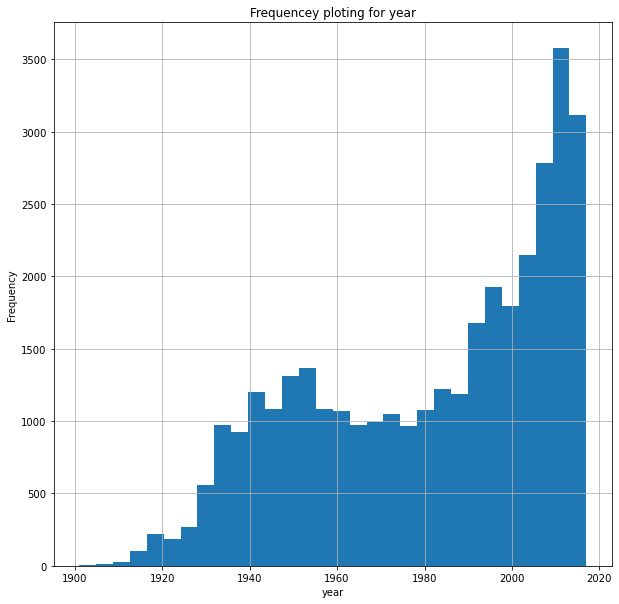

In [5]:
print("Anlyzing Release Year attribute:")
#Frequencey ploting
mov['Release Year'].hist(bins=30, figsize=(10, 10));
plt.title('Frequencey ploting for year')
plt.xlabel('year')
plt.ylabel("Frequency")

most_common = mov['Release Year'].value_counts()
print('The proportion of each class in the dataset:\n'+
       '[class]\t[proportion]')
print(most_common/34886)
draw_index = most_common.index[:10]
print("\n\nThe most common word in the Release Year is ::", most_common.index[0])
print('The least common word in the Release Year is ::',most_common.index[-1])

print('Average sentence length for Release Year attributes: 4')

Anlyzing Origin/Ethnicity attribute:
The proportion of each class in the dataset:
[class]		[proportion]
American        0.498108
British         0.105200
Bollywood       0.084017
Tamil           0.074500
Telugu          0.037580
Japanese        0.034054
Malayalam       0.031388
Hong Kong       0.022674
Canadian        0.020725
Australian      0.016511
South_Korean    0.014963
Chinese         0.013272
Kannada         0.012727
Bengali         0.008771
Russian         0.006650
Marathi         0.004042
Filipino        0.003669
Bangladeshi     0.002494
Punjabi         0.002408
Malaysian       0.002007
Turkish         0.002007
Egyptian        0.001921
Assamese        0.000258
Maldivian       0.000057
Name: Origin/Ethnicity, dtype: float64
The most common word in the Origin/Ethnicity is :: American
The least common word in the Origin/Ethnicity is :: Maldivian
Average sentence length for Origin/Ethnicity attributes:  7.786762598176919


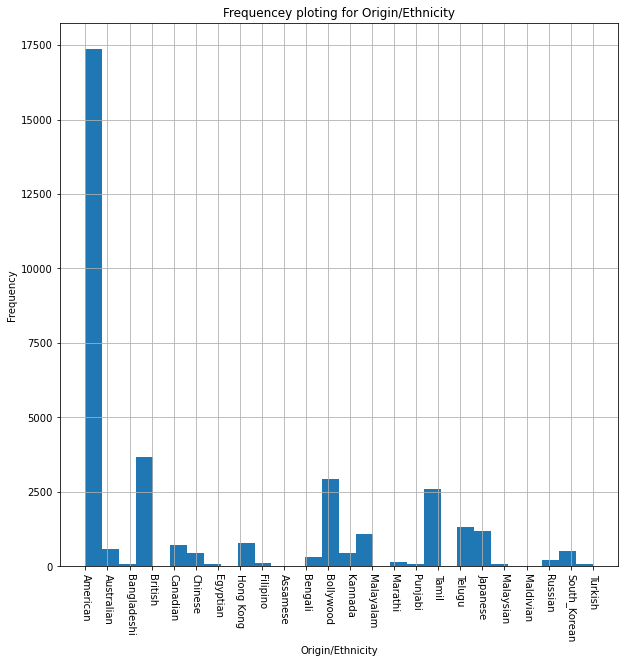

In [6]:
print("Anlyzing Origin/Ethnicity attribute:")
mov['Origin/Ethnicity'].hist(bins=30, figsize=(10, 10))
plt.title('Frequencey ploting for Origin/Ethnicity')
plt.xlabel('Origin/Ethnicity')
plt.ylabel("Frequency")
plt.xticks(rotation=270)


most_common = mov['Origin/Ethnicity'].value_counts()
print('The proportion of each class in the dataset:\n'+
       '[class]\t\t[proportion]')
print(most_common/34886)
draw_index = most_common.index[:10]
print("The most common word in the Origin/Ethnicity is ::", most_common.index[0])
print('The least common word in the Origin/Ethnicity is ::',most_common.index[-1])

#computing the average length
count=0
for i in mov['Origin/Ethnicity']:
    count+=len(i)//1
print('Average sentence length for Origin/Ethnicity attributes: ',count/len(mov['Origin/Ethnicity']))

Anlyzing Title attribute:
The proportion of each class in the dataset:
[class]			[proportion]
Cinderella               0.000229
The Three Musketeers     0.000229
Treasure Island          0.000201
Anna Karenina            0.000172
Alice in Wonderland      0.000172
                           ...   
The Preacher's Wife      0.000029
Red Dragon               0.000029
Soundtrack of Passion    0.000029
Laburnum Grove           0.000029
Do Dooni Chaar           0.000029
Name: Title, Length: 32432, dtype: float64


The most common word in the Title is :: Cinderella
The least common word in the Title is :: Do Dooni Chaar
Average sentence length for Title attributes:  15.540073381872384


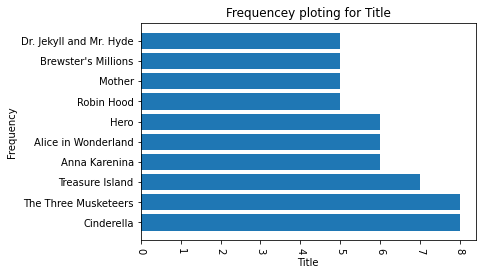

In [7]:
print("Anlyzing Title attribute:")
most_common = mov['Title'].value_counts()
print('The proportion of each class in the dataset:\n'+
       '[class]\t\t\t[proportion]')
print(most_common/34886)
draw_index = most_common.index[:10]
draw_num = most_common[:10]
plt.barh(draw_index, draw_num)
plt.xticks(rotation=270)
plt.title('Frequencey ploting for Title')
plt.xlabel('Title')
plt.ylabel("Frequency")


print("\n\nThe most common word in the Title is ::", most_common.index[0])
print('The least common word in the Title is ::',most_common.index[-1])
#computing the average length
count=0
for i in mov['Title']:
    count+=len(i)//1
print('Average sentence length for Title attributes: ',count/len(mov['Title']))

Anlyzing Director attribute:
The proportion of each class in the dataset:
[class]		    [proportion]
Unknown                                                      0.032219
Michael Curtiz                                               0.002265
Hanna-Barbera                                                0.002207
Lloyd Bacon                                                  0.001892
Jules White                                                  0.001806
                                                               ...   
Adam Jay Epstein, Andrew Jacobson                            0.000029
Mark Andrews, Brenda Chapman, Steve Purcell (co-director)    0.000029
Aditya Sarpotdar                                             0.000029
Rafal Zielenski                                              0.000029
Scott Dow                                                    0.000029
Name: Director, Length: 12593, dtype: float64


The most common word in the Director is :: Unknown
The least common word in the Di

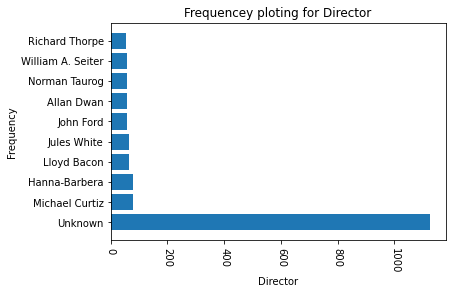

In [8]:
print("Anlyzing Director attribute:")
most_common=mov['Director'].value_counts()
print('The proportion of each class in the dataset:\n'+
       '[class]\t\t    [proportion]')
print(most_common/34886)
draw_index=most_common.index[:10]
draw_num=most_common[:10]
plt.barh(draw_index,draw_num)
plt.xticks(rotation=270)
plt.title('Frequencey ploting for Director')
plt.xlabel('Director')
plt.ylabel("Frequency")

print("\n\nThe most common word in the Director is ::", most_common.index[0])
print('The least common word in the Director is ::',most_common.index[-1])

#computing the average length
count=0
for i in mov['Director']:
    count+=len(i)//1
print('Average sentence length for Director attributes: ',count/len(mov['Director']))

Anlyzing Cast attribute:
The proportion of each class in the dataset:
[class]							  [proportion]
Tom and Jerry                                                                  0.002293
Three Stooges                                                                  0.001605
The Three Stooges                                                              0.001347
Looney Tunes                                                                   0.001061
Bugs Bunny                                                                     0.001032
                                                                                 ...   
John Cusack, Ray Liotta, Amanda Peet, Clea DuVall, Rebecca De Mornay           0.000029
Theresa Russell, Eric Roberts, James Marsden                                   0.000029
Anjelica Huston, Raúl Juliá, Christopher Lloyd, Christina Ricci, Dan Hedaya    0.000029
Tim Daly, Kelly Preston, Rick Rossovich                                        0.000029
Sterling Hayden, Joy 

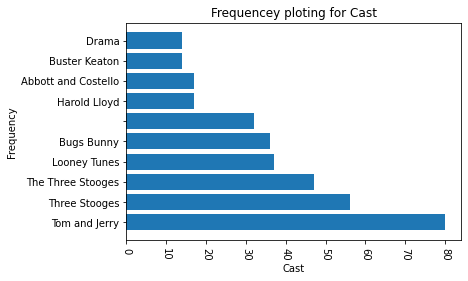

In [9]:
print("Anlyzing Cast attribute:")
most_common = mov['Cast'].value_counts()
print('The proportion of each class in the dataset:\n'+
       '[class]\t\t\t\t\t\t\t  [proportion]')
print(most_common/34886)
draw_index = most_common.index[:10]
draw_num = most_common[:10]
plt.barh(draw_index, draw_num)
plt.xticks(rotation=270)
plt.title('Frequencey ploting for Cast')
plt.xlabel('Cast')
plt.ylabel("Frequency")
print("\n\nThe most common  in the Cast is ::", most_common.index[0])
print('The least common  in the Cast is ::',most_common.index[-1])

#computing the average length
count=0
for i in mov['Cast']:
    if type(i)==float:
        count+=0
    else:
        count+=len(i)
print('Average sentence length for Cast attributes: ',count/len(mov['Cast']))

Anlyzing Genre attribute:
The proportion of each class in the dataset:
[class]						[proportion]
unknown                                                       0.174368
drama                                                         0.170957
comedy                                                        0.125523
horror                                                        0.033452
action                                                        0.031474
                                                                ...   
drama / war                                                   0.000029
documentary short                                             0.000029
fantasy, sci-fi drama                                         0.000029
science fiction[not in citation given]                        0.000029
horror, fantasy, chanbara, supernatural, jidaigeki, action    0.000029
Name: Genre, Length: 2265, dtype: float64


The most common word in the Genre is :: unknown
The least common word in the G

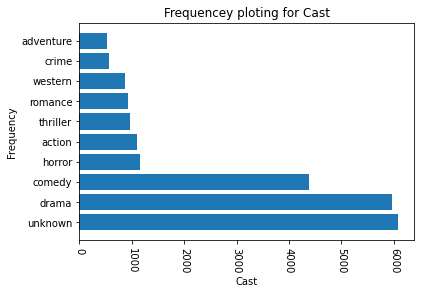

In [10]:
print("Anlyzing Genre attribute:")
most_common = mov['Genre'].value_counts()
print('The proportion of each class in the dataset:\n'+
       '[class]\t\t\t\t\t\t[proportion]')
print(most_common/34886)
draw_index = most_common.index[:10]
draw_num = most_common[:10]
plt.barh(draw_index, draw_num)
plt.xticks(rotation=270)
plt.title('Frequencey ploting for Cast')
plt.xlabel('Cast')
plt.ylabel("Frequency")
print("\n\nThe most common word in the Genre is ::", most_common.index[0])
print('The least common word in the Genre is ::',most_common.index[-1])

#computing the average length
count=0
for i in mov['Genre']:
    count+=len(i)
print('Average sentence length for Genre attributes: ',count/len(mov['Genre']))

In [11]:
# data save temporary for analyze Plot arrtibute
year_group = mov['Plot']
with open ('file1.txt','w')as fob:
    for i in year_group:
        line=i
        json.dump(line,fob)
with open('file1.txt')as fob:
    seq=fob.read()
seq_list=seq.strip('""').split()

In [12]:
mov['Plot'].describe()

count                                                 34886
unique                                                33869
top       (マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...
freq                                                      6
Name: Plot, dtype: object

In [13]:
mov['Wiki Page'].describe()

count                                                 34886
unique                                                34070
top       https://en.wikipedia.org/wiki/Digimon_Adventur...
freq                                                      5
Name: Wiki Page, dtype: object

We could found that the most common sentence in Plot attribute is 

    '(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Choujin Dai Sensou)
    In order to save a princess, Mantarou and the gang must find a special ginseng. They are later joined by Kevin Mask.'
the most common sentence in Plot attribute is 
    https://en.wikipedia.org/wiki/Himitsu_Sentai_Gorenger
    
I don not plot the attribute 'Plot' and 'Wiki Page', becasue it is not applicable. For 'Plot' attributes I will do more anlysis in the next, and find most/least common words in Plot.

In [14]:
Counter = Counter(seq_list)
most_occur = Counter.most_common(1)
print('The most common word in the Plot is ', most_occur)
occur = Counter.most_common()
least_occur = [item for item in occur if item[1] == 1]
# least_occur=occur
print('The least common word in the Plot is ', least_occur[-2:])

#computing the average length
count=0
for i in mov['Plot']:
    count+=len(i)
print('Average sentence length for Plot attributes: ',count/len(mov['Plot']))

The most common word in the Plot is  [('the', 685091)]
The least common word in the Plot is  [('Deniz', 1), ('Soysal', 1)]
Average sentence length for Plot attributes:  2165.0345410766495


### 2. Task 2

Select the following five movie genres (classes): 
Drama, comedy, adventure, romance, western

    Our strategy is to do a simple cleaning of the Genre category in the data set, and then extract the corresponding instance data in the total data set from the Genre category that has been cleaned. I used vertical bars to replace other forms of symbols in the string. In this way, the unified format into which the mark symbols in the string are converted is convenient for our classification management. The specific extraction method is to use groupby's requirements for the topic. 5 Group by category, and then select and extract.

In [10]:
new_gen = mov['Genre'].copy()
new_gen = new_gen.str.strip()
#Create uniform string symbols
new_gen = new_gen.str.replace('/', '|')
new_gen = new_gen.str.replace('–', '|')
new_gen = new_gen.str.replace(' & ', '|')
new_gen = new_gen.str.replace('&', '|')
new_gen = new_gen.str.replace(' - ', '|')
new_gen = new_gen.str.replace('; ', '|')
new_gen = new_gen.str.replace(' / ', '|')
new_gen = new_gen.str.replace(', ', '|')
new_gen = new_gen.str.replace(',', '|')
new_gen = new_gen.str.replace('-', '|')
new_gen = new_gen.str.replace('|| ', '')
# new_gen = new_gen.str.replace('|||', '|')
# new_gen.to_csv('genre.csv')

#get the Drama class raw index in dataset
drama_index=[]
comedy_index=[]
adventure_index=[]
western_index=[]
romance_index=[]
gen_arr=new_gen.values
for i in range(len(gen_arr)):
    if 'drama'in gen_arr[i]:
        drama_index.append(i)
    if 'comedy'in gen_arr[i]:
        comedy_index.append(i)
    if 'adventure'in gen_arr[i]:
        adventure_index.append(i)
    if 'romance'in gen_arr[i]:
        romance_index.append(i)
    if 'western'in gen_arr[i]:
        western_index.append(i)
#according to the raw index get the data instance
drama=new_gen.loc[drama_index]
comedy=new_gen.loc[comedy_index]
adventure=new_gen.loc[adventure_index]
romance=new_gen.loc[romance_index]
western=new_gen.loc[western_index]

In [11]:
print('Classes daram infotmation ::')
print(drama)
print('\nClasses comedy infotmation ::')
print(comedy)
print('\nClasses adventure infotmation ::')
print(adventure)
print('\nClasses romance infotmation ::')
print(romance)
print('\nClasses western infotmation ::')
print(western)

Classes daram infotmation ::
16           drama
17           drama
20           drama
22           drama
23           drama
           ...    
34873        drama
34874        drama
34875        drama
34876        drama
34877    dramafilm
Name: Genre, Length: 9475, dtype: object

Classes comedy infotmation ::
7                comedy
14               comedy
15               comedy
18               comedy
29               comedy
              ...      
34869      comedy|drama
34872      comedy|drama
34882            comedy
34883            comedy
34884    romanticcomedy
Name: Genre, Length: 7266, dtype: object

Classes adventure infotmation ::
19                                               adventure
66                                               adventure
94                                         adventureserial
111                                              adventure
130                                        actionadventure
                               ...                      

### 3. Task 3

Clean the text: (0.05)
* Remove stop words
* Remove numbers and other non-letter characters
* Perform either lemmatization or stemming. Motivate your choice.

For deleting the replacement words, my replacement strategy is to insert the sentences in the Plot attribute of the five classes of data that we have selected, then breaking the sentences in the text into words, and then use the stop words we downloaded from NLTK to matched with the phrase, and eliminated the stoping words.

Then remove the punctuation marks and numbers in the words after the removal. Then my replacement strategy is to use steamming to extract stems.

Reason: 
    
    Based on what we learned from Tutorial， we generally used stemming instead of lemmatization when we want to extract the stem or root of words.
    Because we think that stemming can remove the prefix and suffix of the word to get the root, which avoids the common forms of words in daily life. In this way, the plural of the noun, the tense, the past participle, etc.

    Moreover, the stemming method is relatively simple, and the calculation speed will be faster. In order to maintain the original meaning of the sentence and the text, I prefer the stemming method.
    The stemming method in this question, as I think it is a more suitable English corpus processing scheme, can also help us to carry out part-of-speech tagging and segmentation in subsequent questions.

In [13]:
# import stopwords,and set english stop words
stop_words = stopwords.words('english')

plot_MOV = mov['Plot'].values
clean_stop_seq = []

# Do word-splitting operation


def remove_stopwords(ndarray):
    clean_stop_seq = []
    for i in range(len(ndarray)):
        seq = ndarray[i]
        word_tokens = word_tokenize(seq)
        # Filter stop words
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        clean_stop_seq.append(filtered_sentence)
    return clean_stop_seq

In [14]:
"""This usually need 2m 10s to running"""
clean_stop_seq = remove_stopwords(plot_MOV)

In [15]:
#Remove numbers and other non-letter characters
def remove_num_noletter(LIST):
    new_clean_seq=[]
    for i in LIST:
        word=''
        for j in i:
            item=''.join(filter(str.isalpha, j))
            if item!='':
                word+=item+' '
        new_clean_seq.append(word)
    return new_clean_seq
clean_MOV=remove_num_noletter(clean_stop_seq)

In [16]:
#Remove numbers and other non-letter characters
def stemming(LIST):
    new_list=[]
    for item in LIST:
        after_2step_cleaning_words=word_tokenize(item) 
        # Initial a Porter Stemmer
        ps = PorterStemmer()
        #Extracted evey word stem, then add it into a list
        stemmed_words = ''
        for w in after_2step_cleaning_words:
            stemmed_words+=ps.stem(w)+' '
        new_list.append(stemmed_words)
    return new_list

In [17]:
"""This usually need 3m 45s to running"""
stemmed_MOV=stemming(clean_MOV)

In [18]:
PLOT_MOV = pd.DataFrame(stemmed_MOV, columns=['Plot'])
# according to the raw index get the data instance
drama_clean = PLOT_MOV.loc[drama_index]
comedy_clean = PLOT_MOV.loc[comedy_index]
adventure_clean = PLOT_MOV.loc[adventure_index]
romance_clean = PLOT_MOV.loc[romance_index]
western_clean = PLOT_MOV.loc[western_index]

# print and show a example after data cleaning opration
drama_clean.head()

,Plot
16,On beauti summer day father mother take daught...
17,A thug accost girl leav workplac man rescu the...
20,No print first american film adapt A christma ...
22,A reject admir set trap kill sweetheart fianc ...
23,john wharton husband true trust wife father ei...


### 4. Task 4
Convert the corpus into a bag-of-words tf-idf weighted vector representation. (0.05)

In [19]:
# Initializes a model for computing tfidf
vectorizer = TfidfVectorizer()
# For all dataset toghter
X = PLOT_MOV.copy().values.flatten().tolist()
X_tfidf = vectorizer.fit_transform(X)
print('Transform documents in corpus into TF-IDF functional matrix ::')
print(X_tfidf)
print("\n idf value ::")
print(vectorizer.idf_)

Transform documents in corpus into TF-IDF functional matrix ::
  (0, 59620)	0.05157820783597377
  (0, 32287)	0.14243485652600807
  (0, 77421)	0.06921271369361849
  (0, 4871)	0.0786660734416036
  (0, 82746)	0.14724568200345736
  (0, 33049)	0.08202094827061158
  (0, 117448)	0.10096286323363199
  (0, 95372)	0.24904440780858483
  (0, 101712)	0.1655435427620504
  (0, 88438)	0.15684601569900672
  (0, 16731)	0.12503340681851338
  (0, 13704)	0.07348063996066284
  (0, 68848)	0.1402955434329796
  (0, 34968)	0.21906858126886136
  (0, 99864)	0.13831793502057602
  (0, 8368)	0.10502416248668583
  (0, 119699)	0.14367383744789414
  (0, 9610)	0.06226731272919421
  (0, 41212)	0.1608352037231522
  (0, 107882)	0.07196520166943642
  (0, 43981)	0.07279927990351745
  (0, 29399)	0.12830976942592362
  (0, 32942)	0.10017795266034416
  (0, 43704)	0.14923273092758893
  (0, 85180)	0.09656080983973528
  :	:
  (34885, 102212)	0.2650634139226716
  (34885, 77480)	0.5831720621140178
  (34885, 75307)	0.2480495556268648


In [20]:
#show and print TFIDF for 5 classes

drama_9475=['drama']*9475
comedy_7266=['comedy']*7266
adventure_867=['adventure']*867
romance_1940=['romance']*1940
western_974=['western']*974
genre=[]
genre.extend(drama_9475)
genre.extend(comedy_7266)
genre.extend(adventure_867)
genre.extend(romance_1940)
genre.extend(western_974)


PLOT=pd.concat([drama_clean, comedy_clean]) 
PLOT=pd.concat([PLOT,adventure_clean]) 
PLOT=pd.concat([PLOT, romance_clean]) 
PLOT=pd.concat([PLOT, western_clean]) 


#Initializes a model for computing tfidf
vectorizer = TfidfVectorizer()
X5=PLOT.values.flatten().tolist()
X5_tfidf = vectorizer.fit_transform(X5)
print('Transform documents in corpus into TF-IDF functional matrix ::')
print(X5_tfidf)
print("\n idf value ::")
print(vectorizer.idf_)

Transform documents in corpus into TF-IDF functional matrix ::
  (0, 61956)	0.06117277329176602
  (0, 60076)	0.05450459476933536
  (0, 23832)	0.025906271099621216
  (0, 23990)	0.07179107362301151
  (0, 8913)	0.04430400530788421
  (0, 16113)	0.06841344315332436
  (0, 16626)	0.05888229983301573
  (0, 19659)	0.11840969112840372
  (0, 70840)	0.1015812348045609
  (0, 63698)	0.08103581445873372
  (0, 69163)	0.04149033180036856
  (0, 78773)	0.05822132802158121
  (0, 22896)	0.033259972147169664
  (0, 15827)	0.06281020739137366
  (0, 3792)	0.03483728740794396
  (0, 78387)	0.16019783819471506
  (0, 21897)	0.03948175365546228
  (0, 40123)	0.028306165725688417
  (0, 51631)	0.0606882569127514
  (0, 26599)	0.025856751931234198
  (0, 53527)	0.04507849576669955
  (0, 5675)	0.39048027407410557
  (0, 30989)	0.049952560902439755
  (0, 25668)	0.08965181049608731
  (0, 51998)	0.06613845566950098
  :	:
  (20520, 40123)	0.009178778971770496
  (20520, 26599)	0.07546061585458126
  (20520, 5675)	0.0633100958161

### 5. Task 5
Split the data randomly into training and testing sets (70-30 %). 
* Train SVM and report confusion matrix. (0.1)
* Train Multinomial NB and report confusion matrix. (0.1)
* Which algorithm has a higher weighted F1 measure and why? (0.1)
        
        From the following two confusion matrices, we can find that the SVM model has a higher weighted F1 measure.
        F1 score: The weighted average of precision and recall. The best is 1, the worst is 0;
        F1 = 2 * (precise * recall) / (precise + recall)
        Usually, the two indicators of text data collection accuracy and recall are mutually restrictive. The higher the accuracy rate, the lower the recall rate and the higher the recovery rate. Since the SVM model can obtain a higher precision, the performance of the SVM model tends to be more stable, so the higher the F1 score.
        Then, in order to further prove the correctness of our experimental conclusion, as a supplement, I used the model socre and 5 times corss verification to prove my conclusion.

        On the other hand, the svm model requires a very long time to train the model when calculating and running a large amount of text data, while the MultinomialNB model only needs a short training time to quickly train the entire large text. In terms of computational cost and timeliness, MultinomialNB is obviously much better than the svm model, so for text classification tasks, I recommend the MultinomialNB model.

* Does changing the kernel of the SVM change the weighted F1 measure or decrease confusion between classes? (0.2)

        Through the experiment of changing the kernel function of the SVM model, we can find that when the SVM model uses the Sigmoid function, the F1 score that the model can achieve can be higher. The model has the lowest F 1 score when using the Poly function. Compared with the previous experiment, the functions other than Poly use F1 scores are increasing.


In [26]:
X_train, X_test, label_train, label_test = train_test_split(PLOT, genre, train_size=0.7,
                                                            random_state=1)

Train SVM and report confusion matrix. (0.1)

In [28]:
vectorizer = TfidfVectorizer()
X_train_feature=vectorizer.fit_transform(X_train.values.flatten().tolist())
X_test_features =vectorizer.transform(X_test.values.flatten().tolist())

In [29]:
encoder = LabelEncoder()
train_target = encoder.fit_transform(label_train)
print(np.unique(label_train))
print(np.unique(train_target))
"""We encoder change the Genre to numbers, threbying we would computing faster
in the next high dimension matrix"""

['adventure' 'comedy' 'drama' 'romance' 'western']
[0 1 2 3 4]


'We encoder change the Genre to numbers, threbying we would computing faster\nin the next high dimension matrix'

In [30]:
"""This usually need 9m to running"""
svm=SVC()
svm.fit(X_train_feature,train_target)

# print(len(X_train_feature.toarray()))
# print(len(train_target))

SVC()

[1 2 2 ... 2 2 1]


Text(80.90000000000006, 0.5, 'predicted label')

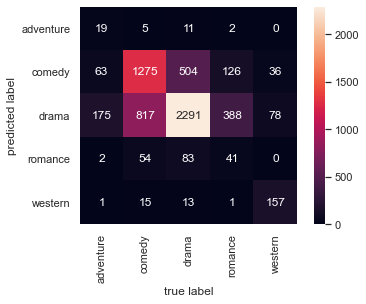

In [31]:
"""This usually need 1m 30s to running"""

sns.set()
predict_labels = svm.predict(X_test_features)

test_target = encoder.fit_transform(label_test)
# Compute confusion matrix for given dataset
print(predict_labels)
mat = confusion_matrix(test_target, predict_labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
plt.xlabel('true label')
plt.ylabel('predicted label')

In [32]:
names = np.unique(label_train)
print("Classification report of the svm classifier:\n\n",
      classification_report(test_target, predict_labels, target_names=names))

Classification report of the svm classifier:

               precision    recall  f1-score   support

   adventure       0.51      0.07      0.13       260
      comedy       0.64      0.59      0.61      2166
       drama       0.61      0.79      0.69      2902
     romance       0.23      0.07      0.11       558
     western       0.84      0.58      0.69       271

    accuracy                           0.61      6157
   macro avg       0.57      0.42      0.45      6157
weighted avg       0.59      0.61      0.59      6157



In [33]:
"""
Train MultinomialNB and report confusion matrix.
This usually need 1s to running"""

model=MultinomialNB()
#Fit the model
model.fit(X_train_feature,train_target)
#Predictions are made using the final estimator
Predictions_labels = model.predict(X_test_features)


Classification report of the MultinomialNB classifier:

               precision    recall  f1-score   support

   adventure       0.00      0.00      0.00       260
      comedy       0.75      0.22      0.34      2166
       drama       0.51      0.97      0.67      2902
     romance       0.00      0.00      0.00       558
     western       0.00      0.00      0.00       271

    accuracy                           0.53      6157
   macro avg       0.25      0.24      0.20      6157
weighted avg       0.50      0.53      0.43      6157



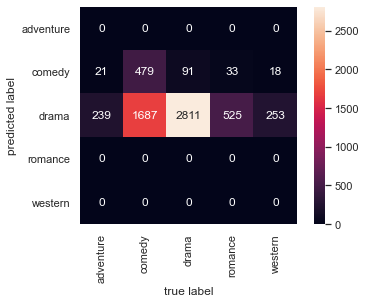

In [34]:
import warnings
warnings.filterwarnings('ignore')
# Compute confusion matrix for given dataset
mat = confusion_matrix(test_target,Predictions_labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Classification report of the MultinomialNB classifier:\n\n",
      classification_report(test_target, Predictions_labels, 
                            target_names=names))

In [35]:
# additional support

print("In order to ensure that there is no under-fitting or over-fitting of the two models")
print('Using the 5 fold cross validation MultinomialNB model classifier score:',
      np.mean(cross_val_score(model, X_train_feature[:450],train_target[:450], cv=5, scoring='accuracy')))
print('Using the 5 fold cross validation SVM model classifier score:',
      np.mean(cross_val_score(svm, X_train_feature[:450],train_target[:450], cv=5, scoring='accuracy')))

In order to ensure that there is no under-fitting or over-fitting of the two models
Using the 5 fold cross validation MultinomialNB model classifier score: 0.45111111111111113
Using the 5 fold cross validation SVM model classifier score: 0.4444444444444445


When the kernel of the SVM change to  rbf


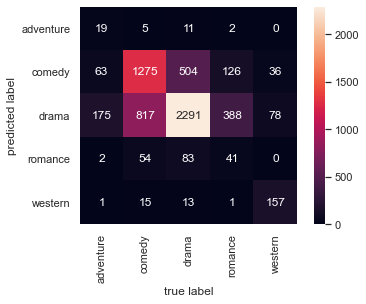

Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.51      0.07      0.13       260
      comedy       0.64      0.59      0.61      2166
       drama       0.61      0.79      0.69      2902
     romance       0.23      0.07      0.11       558
     western       0.84      0.58      0.69       271

    accuracy                           0.61      6157
   macro avg       0.57      0.42      0.45      6157
weighted avg       0.59      0.61      0.59      6157

Best score for the model： 0.908249216846502
----------------------------------------------------------------------
When the kernel of the SVM change to  poly


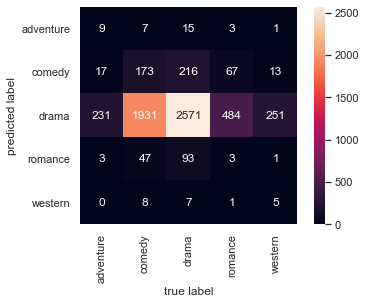

Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.26      0.03      0.06       260
      comedy       0.36      0.08      0.13      2166
       drama       0.47      0.89      0.61      2902
     romance       0.02      0.01      0.01       558
     western       0.24      0.02      0.03       271

    accuracy                           0.45      6157
   macro avg       0.27      0.20      0.17      6157
weighted avg       0.37      0.45      0.34      6157

Best score for the model： 0.9357466063348416
----------------------------------------------------------------------
When the kernel of the SVM change to  linear


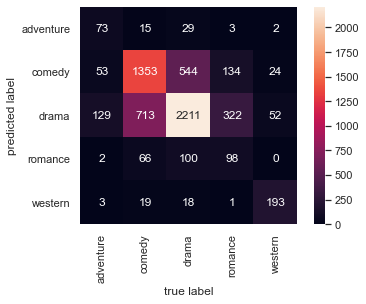

Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.60      0.28      0.38       260
      comedy       0.64      0.62      0.63      2166
       drama       0.65      0.76      0.70      2902
     romance       0.37      0.18      0.24       558
     western       0.82      0.71      0.76       271

    accuracy                           0.64      6157
   macro avg       0.62      0.51      0.54      6157
weighted avg       0.62      0.64      0.62      6157

Best score for the model： 0.860633484162896
----------------------------------------------------------------------
When the kernel of the SVM change to  sigmoid


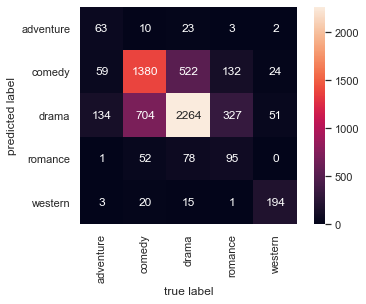

Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.62      0.24      0.35       260
      comedy       0.65      0.64      0.64      2166
       drama       0.65      0.78      0.71      2902
     romance       0.42      0.17      0.24       558
     western       0.83      0.72      0.77       271

    accuracy                           0.65      6157
   macro avg       0.64      0.51      0.54      6157
weighted avg       0.64      0.65      0.63      6157

Best score for the model： 0.8020187956839541
----------------------------------------------------------------------


In [40]:
# Change the kernel function to observation
parameters_grid =['rbf','poly', 'linear', 'sigmoid']
def change_kenerl(string):
    model=SVC(kernel=string)
    print("When the kernel of the SVM change to ",string)
    model.fit(X_train_feature,train_target)
    Predictions_labels=model.predict(X_test_features)
    # Compute confusion matrix for given dataset
    mat = confusion_matrix(test_target,Predictions_labels)

    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("Classification report of the SVM classifier:\n\n",
          classification_report(test_target, Predictions_labels, 
                                target_names=names))
    print('Best score for the model：',model.score(X_train_feature,train_target))
    print('----------------------------------------------------------------------')
for i in parameters_grid:
    change_kenerl(i)

### 6. Task 6

Perform part-of-speech tagging on the raw data (i.e. prior to cleaning it), clean as in Q3, and extract the nouns only to obtain a bag-of-words tf-idf weighted vector representation using only the nouns. Repeat question Q5. 

How does this weighted F1 measure compare with that of Q5? 
        
        Since we extracted the noun part of the words in the text for model training, the F1 score of our model is compared with the previous experimental q5 process,  the F 1 score is showing a downward trend, but the reduction is not big.

How does the size of the vocabulary compare with that of Q5? (0.2)

    Since we did not select all the characters in the text for model training, we just extracted the noun part of the text for the text classifier training, so compared to the word list generated by Q5 before, the word list generated in this experiment is smaller than the previous one, so it runs relatively faster and uses less memory.
Perform part-of-speech tagging on the raw data (i.e. prior to cleaning it)

In [41]:
drama_before_clean=mov['Plot'].loc[drama_index]
comedy_before_clean=mov['Plot'].loc[comedy_index]
adventure_before_clean=mov['Plot'].loc[adventure_index]
romance_before_clean=mov['Plot'].loc[romance_index]
western_before_clean=mov['Plot'].loc[western_index]
drama_before_clean.head()

16    On a beautiful summer day a father and mother ...
17    A thug accosts a girl as she leaves her workpl...
20    No prints of the first American film adaptatio...
22    A rejected admirer sets up a trap to kill his ...
23    John Wharton, the husband of a true and trusti...
Name: Plot, dtype: object

In [42]:
plot_before=pd.concat([drama_before_clean, comedy_before_clean]) 
plot_before=pd.concat([plot_before,adventure_before_clean]) 
plot_before=pd.concat([plot_before, romance_before_clean]) 
plot_before=pd.concat([plot_before, western_before_clean]) 

In [43]:
import nltk
plot_before = plot_before.values
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hung\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [44]:
raw_plot_tag=[]
for i in plot_before:
    tokens=nltk.word_tokenize(i)
    # Part of Speech Tagging for each word in the sentence
    temp=nltk.pos_tag(tokens)
    raw_plot_tag.append(temp)

In [45]:
print(raw_plot_tag[3])

[('A', 'DT'), ('rejected', 'JJ'), ('admirer', 'NN'), ('sets', 'VBZ'), ('up', 'RP'), ('a', 'DT'), ('trap', 'NN'), ('to', 'TO'), ('kill', 'VB'), ('his', 'PRP$'), ('sweetheart', 'NN'), ('and', 'CC'), ('her', 'PRP$'), ('fiance', 'NN'), ('before', 'IN'), ('they', 'PRP'), ('married', 'VBD'), ('and', 'CC'), ('then', 'RB'), ('commit', 'VB'), ('suicide', 'NN'), (',', ','), ('but', 'CC'), ('before', 'IN'), ('he', 'PRP'), ('passes', 'VBZ'), ('away', 'RB'), (',', ','), ('he', 'PRP'), ('leaves', 'VBZ'), ('a', 'DT'), ('confession', 'NN'), ('.', '.'), ('Fortunately', 'RB'), ('the', 'DT'), ('confession', 'NN'), ('is', 'VBZ'), ('found', 'VBN'), ('on', 'IN'), ('time', 'NN'), ('and', 'CC'), ('a', 'DT'), ('police', 'NN'), ('man', 'NN'), ('runs', 'VBZ'), ('to', 'TO'), ('the', 'DT'), ('church', 'NN'), ('to', 'TO'), ('save', 'VB'), ('the', 'DT'), ('couple', 'NN'), ('.', '.')]


clean as in Q3, and extract the nouns only to obtain a bag-of-words tf-idf weighted vector representation using only the nouns

In [46]:
def tag_for_clean(class_clean):
    class_clean=class_clean.values.flatten().tolist()
    class_clean_plot_tag=[]
    for i in class_clean:
        tokens=nltk.word_tokenize(i)
        # Part of Speech Tagging for each word in the sentence
        temp=nltk.pos_tag(tokens)
        class_clean_plot_tag.append(temp)
    return class_clean_plot_tag

In [47]:
drama_clean_plot_tag=tag_for_clean( drama_clean)
comedy_clean_plot_tag=tag_for_clean( comedy_clean)
adventure_clean_plot_tag=tag_for_clean( adventure_clean)
romance_clean_plot_tag=tag_for_clean( romance_clean)
western_clean_plot_tag=tag_for_clean( western_clean)

In [48]:
#show an example after operation
print(drama_clean_plot_tag[3])

[('A', 'DT'), ('reject', 'JJ'), ('admir', 'NN'), ('set', 'VBN'), ('trap', 'NN'), ('kill', 'VB'), ('sweetheart', 'JJ'), ('fianc', 'NN'), ('marri', 'NN'), ('commit', 'NN'), ('suicid', 'JJ'), ('pass', 'NN'), ('away', 'RB'), ('leav', 'JJ'), ('confess', 'NN'), ('fortun', 'NN'), ('confess', 'NN'), ('found', 'VBD'), ('time', 'NN'), ('polic', 'JJ'), ('man', 'NN'), ('run', 'VB'), ('church', 'NN'), ('save', 'NN'), ('coupl', 'NN')]


In [49]:
def extract_n(clean_plot_tag):
    NN_list = []
    for i in clean_plot_tag:
        t = filter(lambda s: s[1] == 'NN', i)
        NN_list.append(list(t))
    return NN_list

In [50]:
drama_clean_nn_tag=extract_n( drama_clean_plot_tag)
comedy_clean_nn_tag=extract_n( comedy_clean_plot_tag)
adventure_clean_nn_tag=extract_n( adventure_clean_plot_tag)
romance_clean_nn_tag=extract_n( romance_clean_plot_tag)
western_clean_nn_tag=extract_n( western_clean_plot_tag)    
print(drama_clean_nn_tag[1])

[('thug', 'NN'), ('accost', 'NN'), ('girl', 'NN'), ('leav', 'NN'), ('workplac', 'NN'), ('man', 'NN'), ('thug', 'NN'), ('vow', 'NN'), ('reveng', 'NN'), ('help', 'NN'), ('friend', 'NN'), ('attack', 'NN'), ('girl', 'NN'), ('rescuer', 'NN'), ('re', 'NN'), ('time', 'NN'), ('rescuer', 'NN'), ('girl', 'NN'), ('home', 'NN'), ('get', 'NN'), ('help', 'NN'), ('neighbor', 'NN'), ('cabin', 'NN'), ('mountain', 'NN'), ('gang', 'NN'), ('trap', 'NN'), ('victim', 'NN'), ('cabin', 'NN'), ('fire', 'NN'), ('thug', 'NN'), ('rescuer', 'NN'), ('fight', 'NN'), ('roof', 'NN')]


In [51]:
def extract_n_word(clean_nn_tag):
    nn_word_list = []
    for i in clean_nn_tag:
        part=''
        for name,value in i:
            part+=name+' '
        nn_word_list.append(part)
    return nn_word_list
drama_nn_word=extract_n_word(drama_clean_nn_tag)
comedy_nn_word=extract_n_word( comedy_clean_nn_tag)
adventure_nn_word=extract_n_word( adventure_clean_nn_tag)
romance_nn_word=extract_n_word( romance_clean_nn_tag)
western_nn_word=extract_n_word( western_clean_nn_tag) 
#show an example after extra norn word
print(drama_nn_word[1])


thug accost girl leav workplac man thug vow reveng help friend attack girl rescuer re time rescuer girl home get help neighbor cabin mountain gang trap victim cabin fire thug rescuer fight roof 


In [52]:
#show and print TFIDF for 5 classes

drama_label=['drama']*len(drama_nn_word)
comedy_label=['comedy']*len(comedy_nn_word)
adventure_label=['adventure']*len(adventure_nn_word)
romance_label=['romance']*len(romance_nn_word)
western_label=['western']*len(western_nn_word)
GENRE=[]
GENRE.extend(drama_label)
GENRE.extend(comedy_label)
GENRE.extend(adventure_label)
GENRE.extend(romance_label)
GENRE.extend(western_label)

nn_word=[]
nn_word.extend(drama_nn_word)
nn_word.extend(comedy_nn_word)
nn_word.extend(adventure_nn_word)
nn_word.extend(romance_nn_word)
nn_word.extend(western_nn_word)


#Initializes a model for computing tfidf
vectorizer = TfidfVectorizer()
nn_word_tfidf = vectorizer.fit_transform(nn_word)
print('Transform documents in corpus into TF-IDF functional matrix ::')
print(nn_word_tfidf)
print("\n idf value ::")
print(vectorizer.idf_)

Transform documents in corpus into TF-IDF functional matrix ::
  (0, 49264)	0.07973873552075601
  (0, 20074)	0.12772048134050623
  (0, 7267)	0.06494874935434762
  (0, 14028)	0.08464333537990514
  (0, 64105)	0.0809971423192438
  (0, 19225)	0.049329446588546454
  (0, 49712)	0.18180993396650008
  (0, 13346)	0.0903577980585894
  (0, 63795)	0.22624980532157007
  (0, 18468)	0.060038380320094314
  (0, 33531)	0.046870386281434286
  (0, 42282)	0.0992738800619805
  (0, 22183)	0.05561408448679604
  (0, 43703)	0.06734100491116103
  (0, 4456)	0.5494990632323422
  (0, 25977)	0.07827292933077823
  (0, 13213)	0.09517634825480599
  (0, 49124)	0.14679250244770709
  (0, 16050)	0.09972324746879367
  (0, 43585)	0.1275316746541539
  (0, 45180)	0.05160122045131503
  (0, 15287)	0.12035624556407053
  (0, 8906)	0.17909723136906716
  (0, 49257)	0.045748211921343165
  (0, 16845)	0.06981263255147516
  :	:
  (20520, 63845)	0.032037596864964824
  (20520, 10114)	0.021774825725462
  (20520, 22273)	0.13637482934458994



Repeat question Q5.

In [53]:
# Split the data randomly into training sets and testing sets (70-30 %)
print(nn_word_tfidf.shape)
X_train, X_test, label_train, label_test = train_test_split(nn_word_tfidf, GENRE, train_size=0.7,
                                                            random_state=1000)



(20522, 66571)


In [54]:
encoder = LabelEncoder()
train_target = encoder.fit_transform(label_train)
print(np.unique(label_train))
print(np.unique(train_target))
"""We encoder change the Genre to numbers, threbying we would computing faster
in the next high dimension matrix"""

['adventure' 'comedy' 'drama' 'romance' 'western']
[0 1 2 3 4]


'We encoder change the Genre to numbers, threbying we would computing faster\nin the next high dimension matrix'

Train SVM and report confusion matrix.

In [55]:
svm=SVC()
svm.fit(X_train,train_target)

SVC()

Classification report of the svm classifier:

               precision    recall  f1-score   support

   adventure       0.46      0.08      0.14       263
      comedy       0.62      0.53      0.57      2195
       drama       0.57      0.79      0.67      2823
     romance       0.17      0.05      0.08       566
     western       0.88      0.48      0.62       310

    accuracy                           0.58      6157
   macro avg       0.54      0.39      0.41      6157
weighted avg       0.56      0.58      0.55      6157



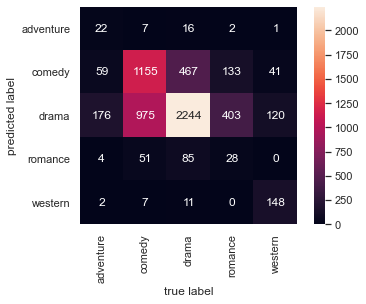

In [56]:
sns.set()
predict_labels = svm.predict(X_test)

test_target = encoder.fit_transform(label_test)
# Compute confusion matrix for given dataset

mat = confusion_matrix(test_target, predict_labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
plt.xlabel('true label')
plt.ylabel('predicted label')

names=np.unique(label_train)
print("Classification report of the svm classifier:\n\n",
      classification_report(test_target, predict_labels, target_names=names))

Train MultinomialNB and report confusion matrix.

In [57]:
model=MultinomialNB()
#Fit the model
model.fit(X_train,train_target)
#Predictions are made using the final estimator
Predictions_labels = model.predict(X_test)

Classification report of the MultinomialNB classifier:

               precision    recall  f1-score   support

   adventure       0.00      0.00      0.00       263
      comedy       0.72      0.17      0.28      2195
       drama       0.49      0.97      0.65      2823
     romance       0.00      0.00      0.00       566
     western       0.00      0.00      0.00       310

    accuracy                           0.51      6157
   macro avg       0.24      0.23      0.19      6157
weighted avg       0.48      0.51      0.40      6157



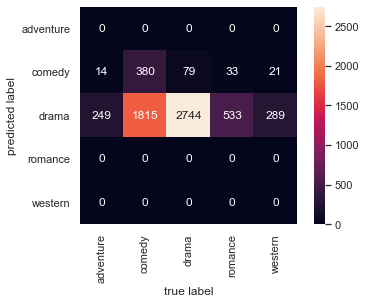

In [58]:
import warnings
warnings.filterwarnings('ignore')
# Compute confusion matrix for given dataset
mat = confusion_matrix(test_target,Predictions_labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Classification report of the MultinomialNB classifier:\n\n",
      classification_report(test_target, Predictions_labels, 
                            target_names=names))

In [59]:
# additional support

print("In order to ensure that there is no under-fitting or over-fitting of the two models")
print('Using the 5 fold cross validation MultinomialNB model classifier score:',
      np.mean(cross_val_score(model, X_train[:450],train_target[:450], cv=5, scoring='accuracy')))
print('Using the 5 fold cross validation SVM model classifier score:',
      np.mean(cross_val_score(svm, X_train[:450],train_target[:450], cv=5, scoring='accuracy')))

In order to ensure that there is no under-fitting or over-fitting of the two models
Using the 5 fold cross validation MultinomialNB model classifier score: 0.48666666666666664
Using the 5 fold cross validation SVM model classifier score: 0.48666666666666664


Which algorithm has a higher weighted F1 measure and why? (0.1)

    From the following two confusion matrices, we can find that the SVM model has a higher weighted F1 measure.
      
      Usually, the two indicators of text data collection accuracy and recall are mutually restrictive. The higher the accuracy rate, the lower the recall rate and the higher the recovery rate. Since the SVM model can obtain a higher precision, the performance of the SVM model tends to be more stable, so the higher the F1 score.
      Then, in order to further prove the correctness of our experimental conclusion, as a supplement, I used the model socre and 5 times corss verification to prove my conclusion.


Does changing the kernel of the SVM change the weighted F1 measure or decrease confusion between classes? (0.2)

    From the following confusion matrix and report, we can find that for the SVM model, when the kernel function is replaced by a linear or sigmoid function, there is a higher F1 score. When using the rbf function and the poly function, the F1 score is relatively low, and the F1 score of the poly function is the lowest in the experiment.

When the kernel of the SVM change to  rbf


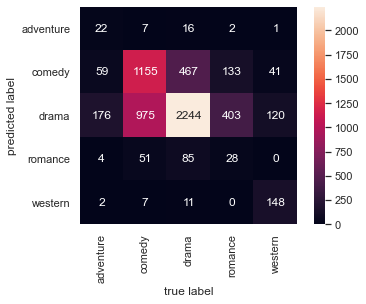

Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.46      0.08      0.14       263
      comedy       0.62      0.53      0.57      2195
       drama       0.57      0.79      0.67      2823
     romance       0.17      0.05      0.08       566
     western       0.88      0.48      0.62       310

    accuracy                           0.58      6157
   macro avg       0.54      0.39      0.41      6157
weighted avg       0.56      0.58      0.55      6157

Best score for the model： 0.9030978071702054
----------------------------------------------------------------------
When the kernel of the SVM change to  poly


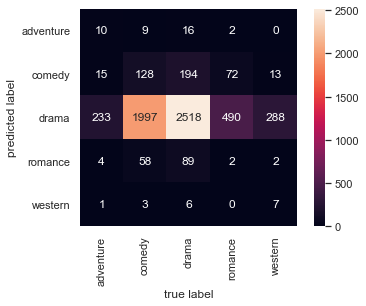

Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.27      0.04      0.07       263
      comedy       0.30      0.06      0.10      2195
       drama       0.46      0.89      0.60      2823
     romance       0.01      0.00      0.01       566
     western       0.41      0.02      0.04       310

    accuracy                           0.43      6157
   macro avg       0.29      0.20      0.16      6157
weighted avg       0.35      0.43      0.32      6157

Best score for the model： 0.9365123564218587
----------------------------------------------------------------------
When the kernel of the SVM change to  linear


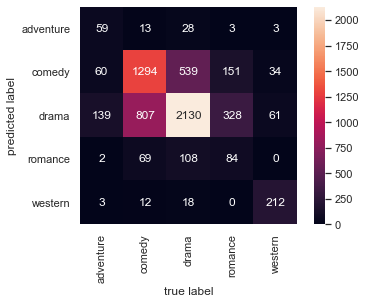

Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.56      0.22      0.32       263
      comedy       0.62      0.59      0.61      2195
       drama       0.61      0.75      0.68      2823
     romance       0.32      0.15      0.20       566
     western       0.87      0.68      0.76       310

    accuracy                           0.61      6157
   macro avg       0.60      0.48      0.51      6157
weighted avg       0.60      0.61      0.60      6157

Best score for the model： 0.8489383919248172
----------------------------------------------------------------------
When the kernel of the SVM change to  sigmoid


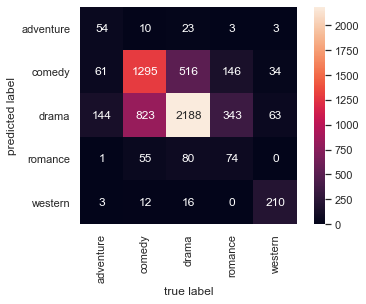

Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.58      0.21      0.30       263
      comedy       0.63      0.59      0.61      2195
       drama       0.61      0.78      0.69      2823
     romance       0.35      0.13      0.19       566
     western       0.87      0.68      0.76       310

    accuracy                           0.62      6157
   macro avg       0.61      0.48      0.51      6157
weighted avg       0.61      0.62      0.60      6157

Best score for the model： 0.7802993386703794
----------------------------------------------------------------------


In [60]:

parameters_grid =['rbf','poly', 'linear', 'sigmoid']
def change_kenerl(string):
    model=SVC(kernel=string)
    print("When the kernel of the SVM change to ",string)
    model.fit(X_train,train_target)
    Predictions_labels=model.predict(X_test)
    # Compute confusion matrix for given dataset
    mat = confusion_matrix(test_target,Predictions_labels)

    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("Classification report of the SVM classifier:\n\n",
          classification_report(test_target, Predictions_labels, 
                                target_names=names))
    print('Best score for the model：',model.score(X_train,train_target))
    print('----------------------------------------------------------------------')
for i in parameters_grid:
    change_kenerl(i)

### 7. Task 7

(Bonus). Fix the class imbalance by the resampling strategy of your choice. Repeat Q5 and compare the performance with what you received in Q5. Discuss your findings. (0.2) 

From the following two confusion matrices, we can find that the SVM model has a higher weighted F1 measure.

On the other hand, the svm model requires a very long time to train the model when calculating and running a large amount of text data, while the MultinomialNB model only needs a short training time to quickly train the entire large text. In terms of computational cost and timeliness, MultinomialNB is obviously much better than the svm model, so for text classification tasks, I recommend the MultinomialNB model.

Then, in order to further prove the correctness of our experimental conclusion, as a supplement, I used the model socre and 5 times corss verification to prove my conclusion. We can see that the MultinomialNB model is slightly higher than the score of the SVM model classifier.

Therefore, for this problem, the MultinomialNB model is better.

In [25]:
# Split the data randomly into training sets and testing sets (70-30 %)

X_train, X_test, label_train, label_test = train_test_split(PLOT, genre, train_size=0.7,
                                                            random_state=1)

In [26]:
vectorizer = TfidfVectorizer()
X_train_feature=vectorizer.fit_transform(X_train.values.flatten().tolist())
X_test_features =vectorizer.transform(X_test.values.flatten().tolist())

encoder = LabelEncoder()
test_target = encoder.fit_transform(label_test)
train_target = encoder.fit_transform(label_train)
print(np.unique(label_train))
print(np.unique(train_target))
names=np.unique(label_train)
"""We encoder change the Genre to numbers, threbying we would computing faster
in the next high dimension matrix"""

['adventure' 'comedy' 'drama' 'romance' 'western']
[0 1 2 3 4]


'We encoder change the Genre to numbers, threbying we would computing faster\nin the next high dimension matrix'

In [23]:
"""This usually need 9m to running"""
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train_feature, train_target)
svm=SVC()
steps = [('sm', SMOTE()),('clf', svm)]
pipeline_svm = Pipeline(steps=steps)
X_train_re, X_test_re, Y_train_re, Y_test_re = train_test_split(X_res, y_res, test_size=0.3,
                                                    random_state=1000)
pipeline_svm.fit(X_train_re, Y_train_re)


Pipeline(steps=[('sm', SMOTE()), ('clf', SVC())])

Classification report of the pipeline_svm classifier:

               precision    recall  f1-score   support

   adventure       0.51      0.16      0.24       260
      comedy       0.64      0.57      0.60      2166
       drama       0.61      0.78      0.68      2902
     romance       0.24      0.11      0.15       558
     western       0.83      0.60      0.70       271

    accuracy                           0.61      6157
   macro avg       0.57      0.44      0.47      6157
weighted avg       0.59      0.61      0.59      6157



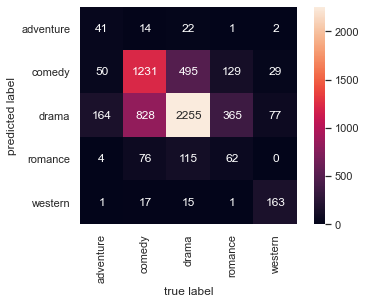

In [25]:
"""This usually need 1m 30s to running"""
sns.set()
predict_labels = pipeline_svm.predict(X_test_features)


# Compute confusion matrix for given dataset

mat = confusion_matrix(test_target, predict_labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
plt.xlabel('true label')
plt.ylabel('predicted label')

names=np.unique(label_train)
print("Classification report of the pipeline_svm classifier:\n\n",
      classification_report(test_target, predict_labels, target_names=names))

Train MultinomialNB and report confusion matrix.

Classification report of the MultinomialNB classifier:

               precision    recall  f1-score   support

   adventure       0.34      0.74      0.47       260
      comedy       0.57      0.67      0.62      2166
       drama       0.74      0.35      0.47      2902
     romance       0.29      0.62      0.39       558
     western       0.52      0.92      0.67       271

    accuracy                           0.53      6157
   macro avg       0.49      0.66      0.52      6157
weighted avg       0.61      0.53      0.53      6157



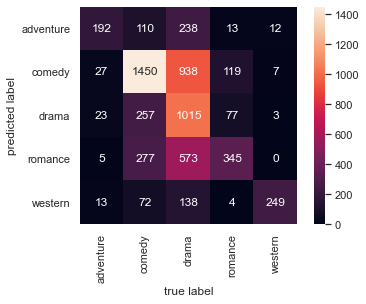

In [26]:
"""This usually need 1s to running"""

sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train_feature, train_target)
steps = [('sm', SMOTE()),('clf', MultinomialNB())]
pipeline_mul = Pipeline(steps=steps)
X_train_re, X_test_re, Y_train_re, Y_test_re = train_test_split(X_res, y_res, test_size=0.3,
                                                    random_state=1000)
#Fit the model
pipeline_mul.fit(X_train_re, Y_train_re)


#Predictions are made using the final estimator
Predictions_labels = pipeline_mul.predict(X_test_features)
import warnings
warnings.filterwarnings('ignore')
# Compute confusion matrix for given dataset
mat = confusion_matrix(test_target,Predictions_labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Classification report of the MultinomialNB classifier:\n\n",
      classification_report(test_target, Predictions_labels, 
                            target_names=names))

In [27]:
# additional support
print("In order to ensure that there is no under-fitting or over-fitting of the two models")
print('Using the 5 fold cross validation MultinomialNB model classifier score:',
      np.mean(cross_val_score(pipeline_mul, X_train_feature[:450],train_target[:450], cv=5, scoring='accuracy')))
print('Using the 5 fold cross validation SVM model classifier score:',
      np.mean(cross_val_score(pipeline_svm, X_train_feature[:450],train_target[:450], cv=5, scoring='accuracy')))

In order to ensure that there is no under-fitting or over-fitting of the two models
Using the 5 fold cross validation MultinomialNB model classifier score: 0.4644444444444445
Using the 5 fold cross validation SVM model classifier score: 0.4444444444444445


Which algorithm has a higher weighted F1 measure and why? (0.1)

    From the following two confusion matrices, we can find that the SVM model has a higher weighted F1 measure.

    Usually, the two indicators of text data collection accuracy and recall are mutually restrictive. The higher the accuracy rate, the lower the recall rate and the higher the recovery rate. Since the SVM model can obtain a higher precision, the performance of the SVM model tends to be more stable, so the higher the F1 score.


Does changing the kernel of the SVM change the weighted F1 measure or decrease confusion between classes? (0.2)

    From the following confusion matrix and report, we can find that for the SVM model, when the kernel function is replaced by a sigmoid function, there is a higher F1 score. When using the rbf function and the poly, linear function, the F1 score is relatively low, and the F1 score of the rbf function is the lowest in the experiment.


When the kernel of the SVM change to  rbf


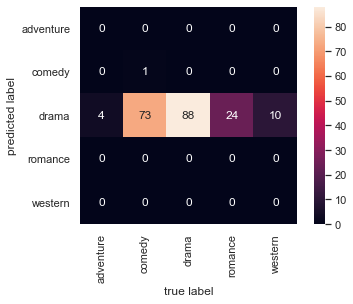

c:\users\hung\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.00      0.00      0.00         4
      comedy       1.00      0.01      0.03        74
       drama       0.44      1.00      0.61        88
     romance       0.00      0.00      0.00        24
     western       0.00      0.00      0.00        10

    accuracy                           0.45       200
   macro avg       0.29      0.20      0.13       200
weighted avg       0.56      0.45      0.28       200

Best score for the model： 0.996
----------------------------------------------------------------------
When the kernel of the SVM change to  poly


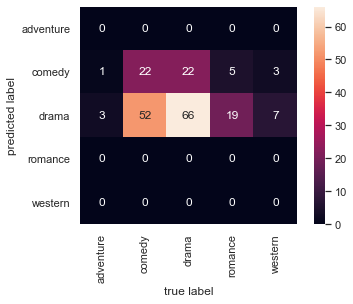

c:\users\hung\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.00      0.00      0.00         4
      comedy       0.42      0.30      0.35        74
       drama       0.45      0.75      0.56        88
     romance       0.00      0.00      0.00        24
     western       0.00      0.00      0.00        10

    accuracy                           0.44       200
   macro avg       0.17      0.21      0.18       200
weighted avg       0.35      0.44      0.38       200

Best score for the model： 0.996
----------------------------------------------------------------------
When the kernel of the SVM change to  linear


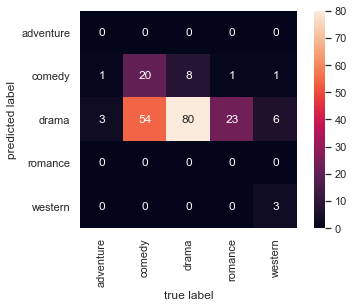

c:\users\hung\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.00      0.00      0.00         4
      comedy       0.65      0.27      0.38        74
       drama       0.48      0.91      0.63        88
     romance       0.00      0.00      0.00        24
     western       1.00      0.30      0.46        10

    accuracy                           0.52       200
   macro avg       0.43      0.30      0.29       200
weighted avg       0.50      0.52      0.44       200

Best score for the model： 0.996
----------------------------------------------------------------------
When the kernel of the SVM change to  sigmoid


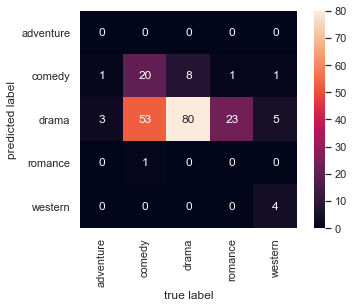

c:\users\hung\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report of the SVM classifier:

               precision    recall  f1-score   support

   adventure       0.00      0.00      0.00         4
      comedy       0.65      0.27      0.38        74
       drama       0.49      0.91      0.63        88
     romance       0.00      0.00      0.00        24
     western       1.00      0.40      0.57        10

    accuracy                           0.52       200
   macro avg       0.43      0.32      0.32       200
weighted avg       0.50      0.52      0.45       200

Best score for the model： 0.992
----------------------------------------------------------------------


In [31]:
parameters_grid =['rbf','poly', 'linear', 'sigmoid']
def change_kenerl(string):
    svm=SVC(kernel=string)
    sm = SMOTE()
    X_res, y_res = sm.fit_resample(X_train_feature[9000:9500], train_target[9000:9500])
    steps = [('sm', SMOTE()),('clf', svm)]
    model = Pipeline(steps=steps)
   
    print("When the kernel of the SVM change to ",string)
    model.fit(X_train_feature[9000:9500],train_target[9000:9500])
    Predictions_labels=model.predict(X_test_features[:200])
    # Compute confusion matrix for given dataset
    mat = confusion_matrix(test_target[:200],Predictions_labels)

    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=np.unique(label_train), yticklabels=np.unique(label_train))
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("Classification report of the SVM classifier:\n\n",
          classification_report(test_target[:200], Predictions_labels, 
                                target_names=names))
    print('Best score for the model：',model.score(X_train_feature[9000:9500],train_target[9000:9500]))
    print('----------------------------------------------------------------------')
for i in parameters_grid:
    change_kenerl(i)